In [96]:
import pandas as pd

## DATA LOADING

In [97]:
df= pd.read_csv('Churn_Modelling.csv')

In [98]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# DATA CLEANING,Data Preprocessing

In [100]:
df.drop(['RowNumber',	'CustomerId',	'Surname'],axis=1,inplace=True)

In [101]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [102]:
df=pd.get_dummies(df,drop_first=True)

In [103]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [104]:
df.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64
Geography_Germany,bool


In [105]:
df=df.astype('int')

In [106]:
df.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,int64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,int64
Exited,int64
Geography_Germany,int64


In [107]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [108]:
print(df.isnull().sum())

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


# STANDARDIZING DATA

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
list=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [112]:
df[list]=scaler.fit_transform(df[list])

In [113]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225847,-0.911583,1,1,0.021880,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117342,-0.911583,0,1,0.216532,0,0,1,0
2,-1.536794,0.293517,1.032908,1.333050,2.527057,1,0,0.240686,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225847,0.807737,0,0,-0.108920,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785723,-0.911583,1,1,-0.365269,0,0,1,0


In [114]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [115]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225847,-0.911583,1,1,0.021880,0,0,0
1,-0.440036,0.198164,-1.387538,0.117342,-0.911583,0,1,0.216532,0,1,0
2,-1.536794,0.293517,1.032908,1.333050,2.527057,1,0,0.240686,0,0,0
3,0.501521,0.007457,-1.387538,-1.225847,0.807737,0,0,-0.108920,0,0,0
4,2.063884,0.388871,-1.041760,0.785723,-0.911583,1,1,-0.365269,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225847,0.807737,1,0,-0.066422,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306384,-0.911583,1,1,0.027983,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225847,-0.911583,0,1,-1.008645,0,0,0
9998,1.256835,0.293517,-0.695982,-0.022607,0.807737,1,0,-0.125231,1,0,1


In [116]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# TRAIN,TEST SPLIT

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **LogisticRegression**

In [119]:
from sklearn.linear_model import LogisticRegression


In [120]:
logR=LogisticRegression()

In [121]:
logR.fit(x_train,y_train)

LogisticRegression()

# ACCURACY SCORE

In [122]:
from sklearn.metrics import accuracy_score
y_predict=logR.predict(x_test)
print("accuracy score =",accuracy_score(y_test,y_predict))

accuracy score = 0.811


# **RandomForestClassifier**

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier  = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_predict = rf_classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.8675


In [124]:
x1=df.drop(['Balance','Exited'],axis=1)
y1=df['Balance']

In [125]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

# **LinearRegression**

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
lr=LinearRegression()

In [128]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_predict=lr.predict(x1_test)
print("r2 score =",r2_score(y1_test,y_predict))

r2 score = 0.2303990403849009


In [130]:
print("mean squared error=",mean_squared_error(y1_test,y_predict))

mean squared error= 0.750837495755701


# **RandomForestRegressor**

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

x1=df.drop(['Balance','Exited','Gender_Male','HasCrCard','IsActiveMember'],axis=1)
y1=df['Balance']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=0)


In [132]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)

In [133]:
rf_regressor.fit(x1_train,y1_train)

RandomForestRegressor(random_state=42)

In [134]:
y_predict=rf_regressor.predict(x1_test)
print("r2 score =",r2_score(y1_test,y_predict))

r2 score = 0.24916321063959102


# **FEATURE** **IMPORTANCES**

In [135]:


importance = pd.DataFrame({
    'Feature': x1.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


             Feature  Importance
4    EstimatedSalary    0.235408
0        CreditScore    0.197028
3      NumOfProducts    0.169950
5  Geography_Germany    0.160519
1                Age    0.129790
2             Tenure    0.087345
6    Geography_Spain    0.019960


# **KMEANS** **CLUSTERRING**

In [136]:
from sklearn.cluster import KMeans

x = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(x)


In [137]:
df.groupby('Cluster').mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
Cluster,,,,,,,,,,,,
0,-0.862111,0.120089,-0.009415,0.700442,-0.251549,0.705034,0.505369,0.057490,0.264765,0.398993,0.203356,0.546980
1,-0.000138,-0.047566,0.017795,-1.202138,0.421710,0.717397,0.517881,-0.019678,0.140629,0.008873,0.327776,0.541006
2,0.778432,-0.054822,-0.011549,0.722034,-0.248023,0.692517,0.520751,-0.029730,0.219630,0.389882,0.197516,0.549833


In [138]:
df.groupby('Cluster')[['CreditScore','Balance','EstimatedSalary']].mean()


,CreditScore,Balance,EstimatedSalary
Cluster,,,
0,-0.862111,0.700442,0.057490
1,-0.000138,-1.202138,-0.019678
2,0.778432,0.722034,-0.029730


Cluster 0 → Low credit score, but high balance → Maybe risky but rich customers

Cluster 1 → Average credit, low balance → Regular users

Cluster 2 → High credit score and balance → Premium customers

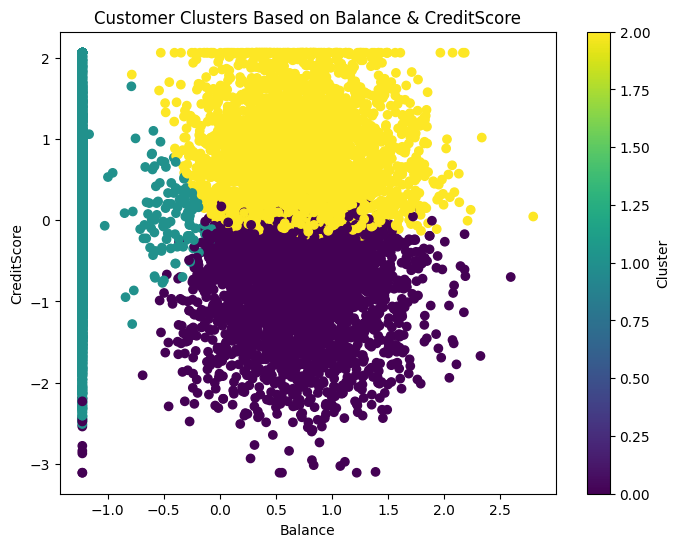

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Balance'], df['CreditScore'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('CreditScore')
plt.title('Customer Clusters Based on Balance & CreditScore')
plt.colorbar(label='Cluster')
plt.show()

# **SAVING THE** **MODEL**

In [140]:
import joblib
models = {
    'Logistic Regression':logR,
    'Linear Regression':lr,
    'Random Forest Classifier':rf_classifier,
    'Random Forest Regressor': rf_regressor,
    'KMeans': kmeans
}

joblib.dump(models, 'customer_behavior_models.pkl')

print("All models saved in one file ✅")


All models saved in one file ✅


# **LOAD THE MODEL FOR REUSABILITY**

In [142]:
import joblib

# Load the full dictionary back
models = joblib.load('customer_behavior_models.pkl')

# Check which models are inside
print(models.keys())


dict_keys(['Logistic Regression', 'Linear Regression', 'Random Forest Classifier', 'Random Forest Regressor', 'KMeans'])
